# Ejercicio 3

Tal y como se determinó en el enunciado, la cantidad máxima de clientes en simultáneo es de 50. Por lo tanto, tenemos un total de 51 estados: del 1 al 51. En el instante t, la cantidad de gente conectada más uno será nuestro estado iésimo.

De ésta forma, armar la matriz de transición es algo trivial ya que la P de que el home banking pase del estado i al j está dada por la fórmula P(i->j)

    M = | P(1->1)  P(1->2)   P(1->3)   P(1->4)   ...   P(1->51)      |
        | P(2->1)  P(2->2)   P(2->3)   P(2->4)   ...   P(2->51)      |
        | P(3->1)  P(3->2)   P(3->3)   P(3->4)   ...   P(3->51)      |
        |  ....     ....      ....      ....     ...    ....         |
        | P(51->1)  P(51->2)   P(51->3)   P(51->4)   ...   P(51->51) |
        
Adonde P(i->j) es

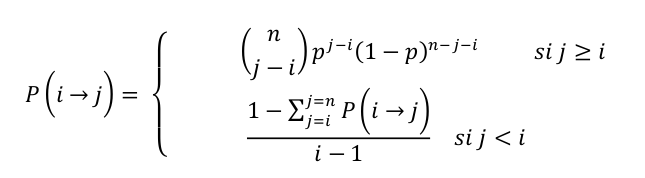

In [71]:
from math import factorial
import numpy as np
import matplotlib.pyplot as plt

class HomeBanking():
    
    def __init__(self):
        self.estado_actual = 1
        self.estados = [self.estado_actual]
        
    def calcular_matriz(self):
        def P(i, j):
            p = 0.7
            n = 51
            if j >= i:
                comb = ( factorial(n) / factorial(n-(j-i)) ) / (factorial(j-i))
                res1 = comb * p**(j-i) * (1-p)**(n-(j-i))
                return res1

            # j < i
            suma = 0
            for x in range(i, n):
                suma += P(i, x)

            res2 = (1 - suma) / (i-1)
            return res2

        M = [[P(i, j) for j in range(1, 52)] for i in range(1, 52)]
        self.matriz = M
        return self.matriz
    
    def nuevo_usuario_conectado(self):
        if self.estado_actual == 51:
            return
        
        self.estado_actual += 1
        print('Estado actual es {0}'.format(self.estado_actual))
    
    def simular_n_observaciones(self, n):
        self.estados = []
        for i in range(0, n):
            pass
        
    def calcular_nuevo_estado(self):
        if self.matriz is None:
            self.calcular_matriz()
            
        fila_actual = self.matriz[self.estado_actual-1]
        suma = 0
        r = np.random.rand()
        for i, item in enumerate(fila_actual):
            suma += item
            if r <= suma:
                self.estado_actual = i
                self.estados.append(self.estado_actual)
                print('Estado actual es {0}'.format(self.estado_actual))
                return self.estado_actual
                
    def get_estados(self):
        return self.estados

        
hb = HomeBanking()
M = hb.calcular_matriz()

## a) Matriz de transición de estados
Como primera medida, trataremos de determinar la matriz de transición, para lo que necesitaremos evaluar los autovalores de M. Según su valor vamos a poder ver si M^(n) converge

In [72]:
eigenvalues, eigenvectors = np.linalg.eig(M)
for e in eigenvalues:
    if abs(e) > 1:
        print('Este falla {0}'.format(e))

Este falla (1.0197614687852017+0j)


Ahora lo que sucede es que como hay uno cuyo modulo es mayor que 1 deberíamos decir que no converge con N-> inf...

Obviamente no es lo que vamos a decir, de hecho podemos probarlo y después vemos qué pasa

In [73]:
M_n = np.linalg.matrix_power(M, 100)
M_n

array([[0.15933146, 0.15933096, 0.15932909, ..., 0.14675865, 0.1399951 ,
        0.13299797],
       [0.1592467 , 0.1592462 , 0.15924433, ..., 0.14668058, 0.13992063,
        0.13292722],
       [0.15916679, 0.15916629, 0.15916442, ..., 0.14660698, 0.13985041,
        0.13286052],
       ...,
       [0.16154757, 0.16154705, 0.16154516, ..., 0.14879989, 0.14194226,
        0.13484781],
       [0.16148368, 0.16148317, 0.16148127, ..., 0.14874104, 0.14188613,
        0.13479448],
       [0.16142109, 0.16142058, 0.16141869, ..., 0.14868339, 0.14183113,
        0.13474224]])

## b) SIimulación de 100 observaciones. Cómo se modifica la cantidad de clientes conectados

In [74]:
for i in range (100):
    print('Iteracion {0}'.format(i))
    r = np.random.rand()
    if r <= 0.7:
        hb.nuevo_usuario_conectado()
        
    nuevo_estado = hb.calcular_nuevo_estado()

Iteracion 0
Estado actual es 39
Iteracion 1
Estado actual es 40
Estado actual es 25
Iteracion 2
Estado actual es 17
Iteracion 3
Estado actual es 18
Estado actual es 4
Iteracion 4
Estado actual es 44
Iteracion 5
Estado actual es 45
Estado actual es 7
Iteracion 6
Estado actual es 8
Estado actual es 41
Iteracion 7
Estado actual es 42
Estado actual es 17
Iteracion 8
Estado actual es 18
Estado actual es 48
Iteracion 9
Estado actual es 30
Iteracion 10
Estado actual es 31
Estado actual es 25
Iteracion 11
Estado actual es 6
Iteracion 12
Estado actual es 7
Estado actual es 36
Iteracion 13
Estado actual es 25
Iteracion 14
Estado actual es 26
Estado actual es 24
Iteracion 15
Estado actual es 25
Estado actual es 8
Iteracion 16
Estado actual es 9
Estado actual es 47
Iteracion 17
Estado actual es 48
Estado actual es 8
Iteracion 18
Estado actual es 9
Estado actual es 42
Iteracion 19
Estado actual es 43
Estado actual es 28
Iteracion 20
Estado actual es 29
Estado actual es 0
Iteracion 21
Estado actual 

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100]
[1, 39, 25, 17, 4, 44, 7, 41, 17, 48, 30, 25, 6, 36, 25, 24, 8, 47, 8, 42, 28, 0, 36, 34, 19, 15, 3, 35, 23, 20, 15, 1, 37, 26, 17, 12, 47, 10, 46, 45, 26, 19, 45, 34, 15, 11, 47, 43, 18, 16, 6, 35, 30, 5, 39, 8, 44, 42, 11, 2, 35, 27, 24, 7, 43, 30, 5, 38, 33, 5, 42, 19, 46, 32, 30, 8, 46, 25, 12, 46, 24, 7, 46, 16, 49, 45, 23, 19, 1, 34, 31, 23, 14, 46, 21, 5, 41, 29, 21, 13, 47]


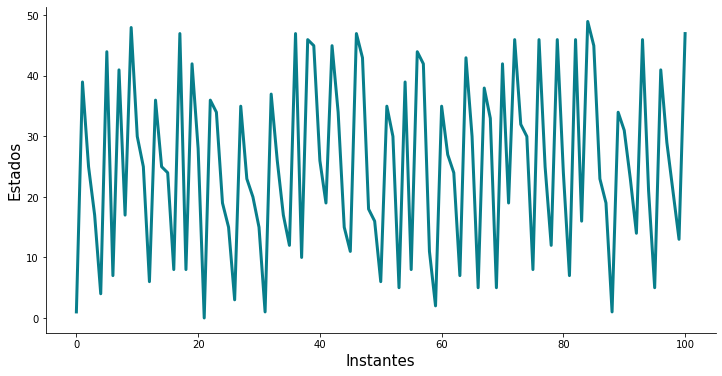

In [85]:
estados = hb.get_estados()
# assert len(estados) == 101
instantes = [i for i in range(len(estados))]

fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(1, 1, 1)
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
plt.plot(instantes, estados, color='#087E8B', linewidth=3.0)
plt.xlabel('Instantes', size=15)
plt.ylabel('Estados', size=15)
plt.show()

In [ ]:
## c) Histograma
# print(len(estados))
# estados_distintos = list(set(estados))
# cantidades = [estados.count(x) for x in estados_distintos]
# print(estados_distintos)
# print(cantidades)
